# Prueba tecnica

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pylab as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv("../data/measurements.csv")

df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [13]:
df.shape

(388, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


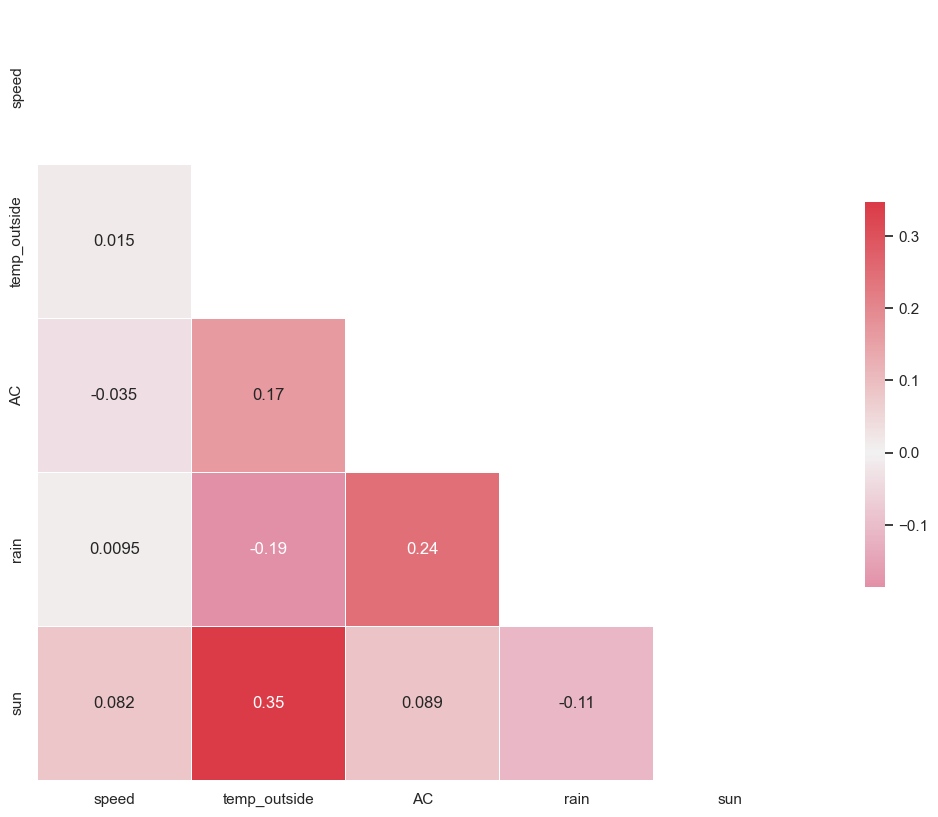

In [16]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [18]:
df.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [19]:
df.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [20]:
df['refill gas'].value_counts()

SP98    8
E10     5
Name: refill gas, dtype: int64

In [21]:
# lets get the the refill column to bool

In [27]:
df['refill gas'] = df['refill gas'].fillna(0)

df['refill gas'] = df['refill gas'].replace('SP98', 1)

df['refill gas'] = df['refill gas'].replace('E10', 1)

df['refill gas'].value_counts()

0    375
1     13
Name: refill gas, dtype: int64

In [31]:
df.distance = df.distance.str.replace(',', '.')

df.consume = df.consume.str.replace(',', '.')

In [32]:
df.distance = df.distance.astype(float)

df.consume = df.consume.astype(float)

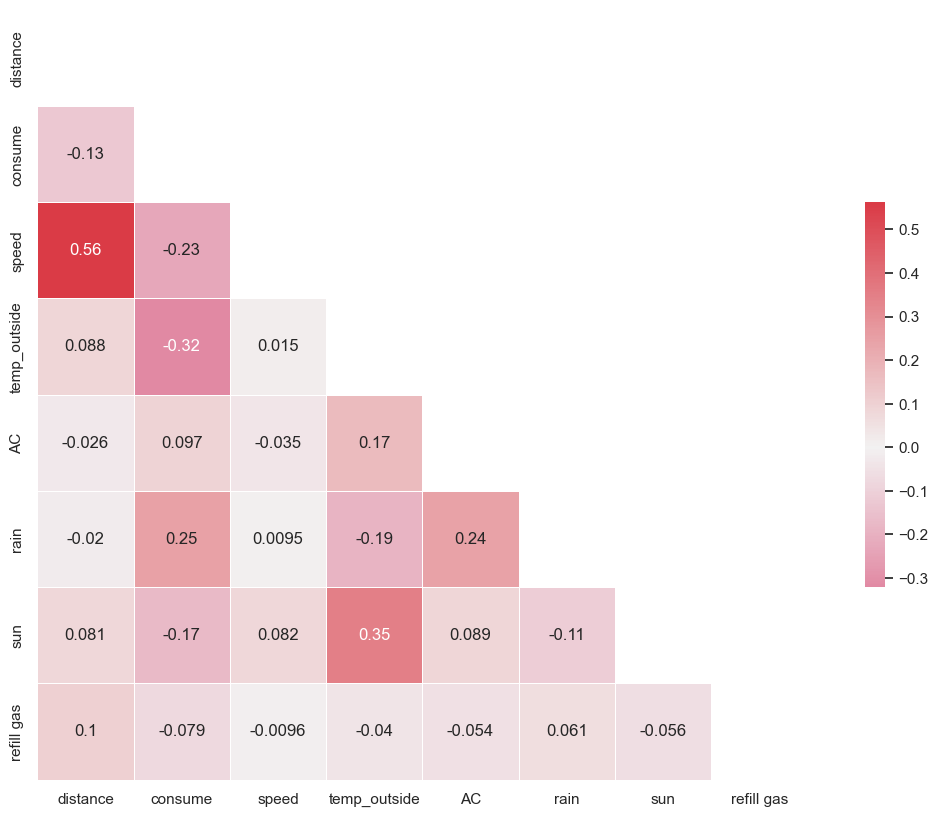

In [33]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    object 
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     388 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 36.5+ KB


In [37]:
df.temp_inside.value_counts()

21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [38]:
df.temp_inside = df.temp_inside.str.replace(',', '.')

In [39]:
df.temp_inside = df.consume.astype(float)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     388 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 36.5+ KB


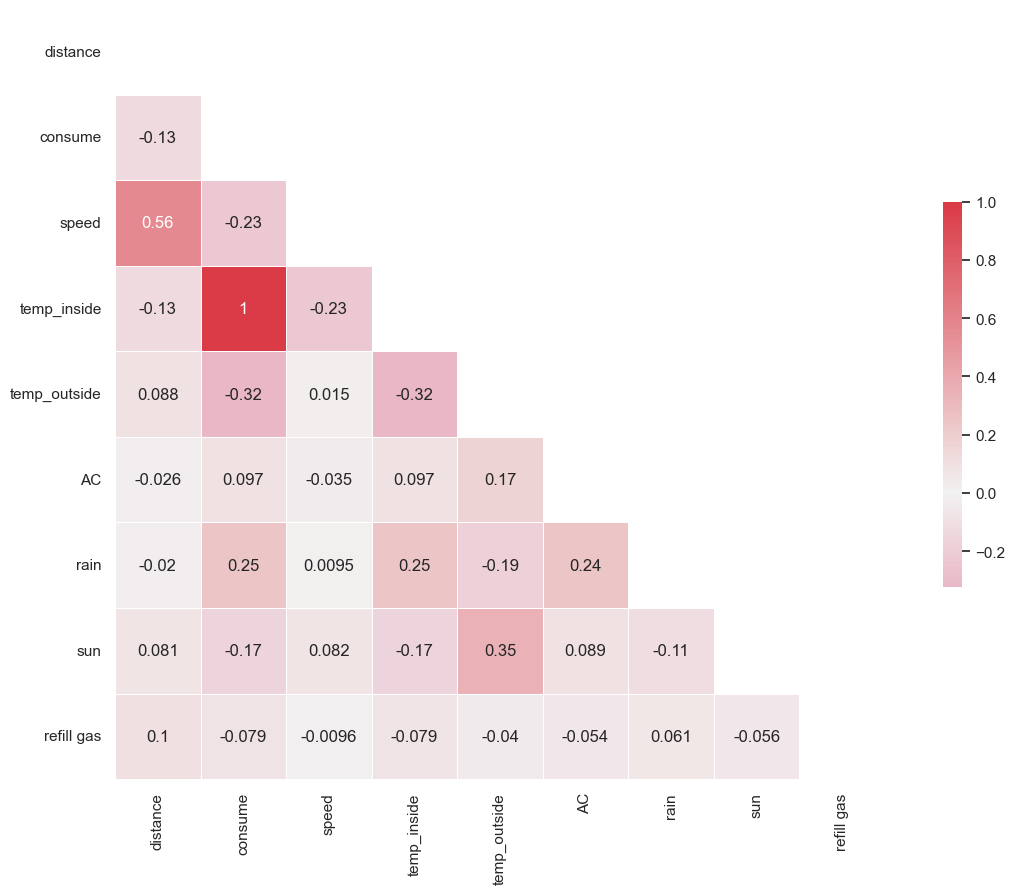

In [41]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [42]:
df['refill gas'].value_counts()

0    375
1     13
Name: refill gas, dtype: int64

In [44]:
df['refill liters'].value_counts()

45      2
37,7    2
39      2
37,6    1
38      1
38,3    1
10      1
41      1
37      1
37,2    1
Name: refill liters, dtype: int64

In [45]:
df['refill liters'] = df['refill liters'].str.replace(',', '.')

In [46]:
df['refill liters'] = df['refill liters'].astype(float)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     388 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 36.5+ KB


In [52]:
df.groupby('gas_type')['consume'].mean()

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64

In [53]:
df.groupby('gas_type')['speed'].mean()

gas_type
E10     43.506250
SP98    40.820175
Name: speed, dtype: float64

In [61]:
df.groupby('gas_type')['temp_inside']

In [70]:
pd.crosstab(df.gas_type, df.consume).T

gas_type,E10,SP98
consume,,
3.3,0,1
3.6,0,4
3.7,2,6
3.8,6,5
3.9,6,8
4.0,6,11
4.1,4,16
4.2,6,9
4.3,7,13


In [81]:
a = pd.pivot_table(data = df, columns = 'gas_type', aggfunc='median')
a

gas_type,E10,SP98
AC,0.0,0.00
consume,4.8,4.70
distance,15.4,14.15
rain,0.0,0.00
refill gas,0.0,0.00
refill liters,38.3,37.65
speed,42.0,39.50
sun,0.0,0.00
temp_inside,4.8,4.70
temp_outside,9.0,11.00


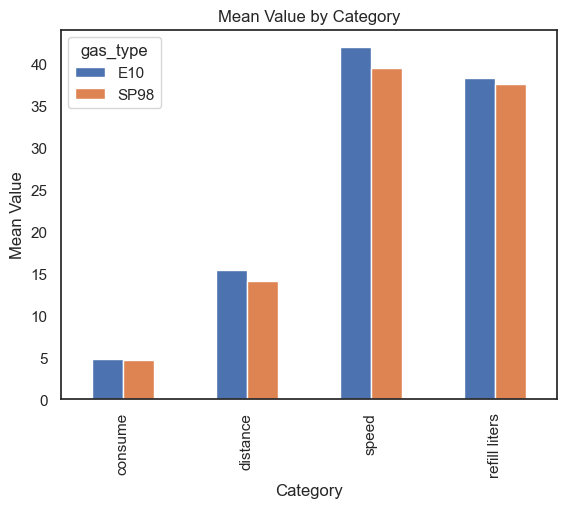

In [85]:
a.loc[['consume','distance','speed','refill liters']].plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.title('Mean Value by Category')

# Mostrar el gráfico
plt.show()

In [86]:
sp98_price = 1.89

e10_price = 1.76

In [ ]:
# Podemos concluir que el e10 es mas barato, y con el mismo consumo, hace mas distancia, va a mas velocidad y 